<a href="https://colab.research.google.com/github/Nido89/RegressionInTenserflow3.0/blob/master/AIMLwithTenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df1 = pd.read_json("https://meri.digitraffic.fi/api/v1/metadata/vessels")
df1.head()

,timestamp,destination,name,mmsi,callSign,imo,shipType,draught,eta,posType,referencePointA,referencePointB,referencePointC,referencePointD
0,2019-10-24 10:58:21.457,NORRKOPING SWEDEN,NEAPOLIS,241530000,SVCR4,9792199,80,85,697472,1,189,39,8,24
1,2019-08-28 05:18:20.325,ROOMASSAARE ABRUKA,ABRO,276808000,ESKA,0,60,0,1596,1,5,10,2,2
2,2018-10-17 22:10:27.596,SPB,VOLGONEFT-102,273274000,UBCE,0,90,36,691456,15,103,23,6,10
3,2019-10-25 05:21:14.935,KOKKOLA,PILOT L138,230988890,OJ3544,0,50,23,1596,1,11,5,3,3
4,2018-10-10 18:19:37.007,ICDAS TURKEY,SPAR URSA,259794000,LALC7,9490856,70,91,707328,1,160,30,20,12


In [0]:
import pandas as pd
url='https://cdn.fmi.fi/fmiodata-convert-api/output/csv-edee1994-043c-41f2-b8f6-efe4da29fcf3.csv'
df2 = pd.read_csv(url) 
df2.head()

,Year,m,d,Time,Time zone,Horizontal visibility (m),Wind speed (m/s)
0,2019,10,24,00:00,UTC,36130,2.4
1,2019,10,24,01:00,UTC,34380,3.1
2,2019,10,24,02:00,UTC,28590,2.6
3,2019,10,24,03:00,UTC,31840,2.2
4,2019,10,24,04:00,UTC,29790,2.2


In [0]:
df3=df_index = pd.merge(df1, df2, right_index=True, left_index=True)

df3.head(7)


,timestamp,destination,name,mmsi,callSign,imo,shipType,draught,eta,posType,referencePointA,referencePointB,referencePointC,referencePointD,Year,m,d,Time,Time zone,Horizontal visibility (m),Wind speed (m/s)
0,2019-10-24 10:58:21.457,NORRKOPING SWEDEN,NEAPOLIS,241530000,SVCR4,9792199,80,85,697472,1,189,39,8,24,2019,10,24,00:00,UTC,36130,2.4
1,2019-08-28 05:18:20.325,ROOMASSAARE ABRUKA,ABRO,276808000,ESKA,0,60,0,1596,1,5,10,2,2,2019,10,24,01:00,UTC,34380,3.1
2,2018-10-17 22:10:27.596,SPB,VOLGONEFT-102,273274000,UBCE,0,90,36,691456,15,103,23,6,10,2019,10,24,02:00,UTC,28590,2.6
3,2019-10-25 05:21:14.935,KOKKOLA,PILOT L138,230988890,OJ3544,0,50,23,1596,1,11,5,3,3,2019,10,24,03:00,UTC,31840,2.2
4,2018-10-10 18:19:37.007,ICDAS TURKEY,SPAR URSA,259794000,LALC7,9490856,70,91,707328,1,160,30,20,12,2019,10,24,04:00,UTC,29790,2.2
5,2019-10-25 05:16:35.018,SEA TRAIL,FANNY,230103660,OIEM,7359266,60,32,322304,1,10,24,2,6,2019,10,24,05:00,UTC,50000,2.3
6,2019-09-17 23:39:06.515,STETTIN,LISA D,304559000,V2OK3,8205187,70,23,630144,1,60,14,3,9,2019,10,24,06:00,UTC,46760,3.6


In [0]:
df4 = df3["eta"]
  
df4.head(10)

0    697472
1      1596
2    691456
3      1596
4    707328
5    322304
6    630144
7    650432
8    803584
9    678208
Name: eta, dtype: int64

In [0]:
df5 = df2["Horizontal visibility (m)"]
df5.head(10)

0    36130
1    34380
2    28590
3    31840
4    29790
5    50000
6    46760
7    42690
8    47620
9    43890
Name: Horizontal visibility (m), dtype: int64

In [0]:
df6= df2["Wind speed (m/s)"]
df6.head(10)

0    2.4
1    3.1
2    2.6
3    2.2
4    2.2
5    2.3
6    3.6
7    3.9
8    3.4
9    4.3
Name: Wind speed (m/s), dtype: float64

In [0]:
#Horizontal Visibility plus eta
df7= pd.merge(df4, df5, right_index=True, left_index=True)
df7.head(7)


,eta,Horizontal visibility (m)
0,697472,36130
1,1596,34380
2,691456,28590
3,1596,31840
4,707328,29790
5,322304,50000
6,630144,46760


In [0]:
#eta plus WindSpeed
df8= pd.merge(df4, df6, right_index=True, left_index=True)
df8.tail(7)

,eta,Wind speed (m/s)
18,405632,5.0
19,774144,4.9
20,612736,4.1
21,639488,3.7
22,704926,3.1
23,700800,3.6
24,588820,3.5


In [0]:
import tensorflow as tf #importing the tensorflow library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [0]:
x= df4
y= df5

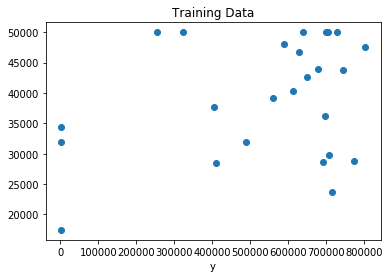

In [0]:
n = len(x) # Number of data points 
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

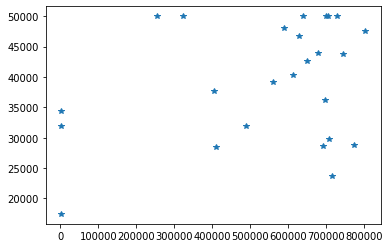

In [0]:
plt.plot(x,y,"*")

In [0]:
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(error)

In [0]:
# importing the dependencies 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

# Model Parameters 
learning_rate = 0.01
training_epochs = 2000
display_step = 200

# Training Data 
train_X = np.asarray([df4]) 
train_y = np.asarray([df5]) 
n_samples = train_X.shape[0] 

In [0]:

# Test Data 
from sklearn.model_selection import train_test_split



Epoch:   200 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:   400 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:   600 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:   800 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:  1000 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:  1200 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:  1400 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:  1600 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:  1800 	 Cost:       nan 	 W:   nan 	 b:   nan
Epoch:  2000 	 Cost:       nan 	 W:   nan 	 b:   nan
Optimization Finished!
Final training cost: nan W: nan b: nan 



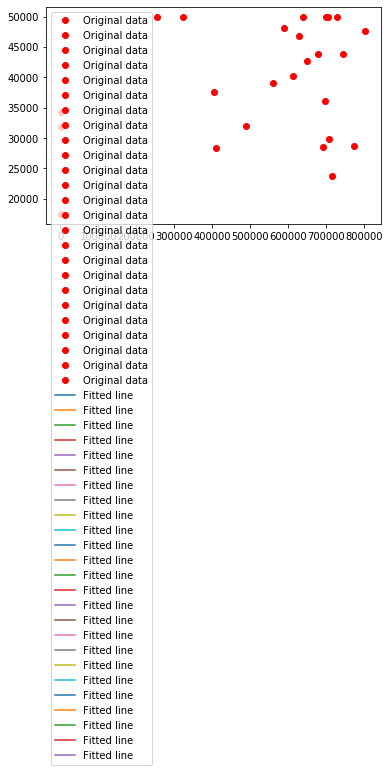

Final testing cost: nan
Absolute mean square loss difference: nan


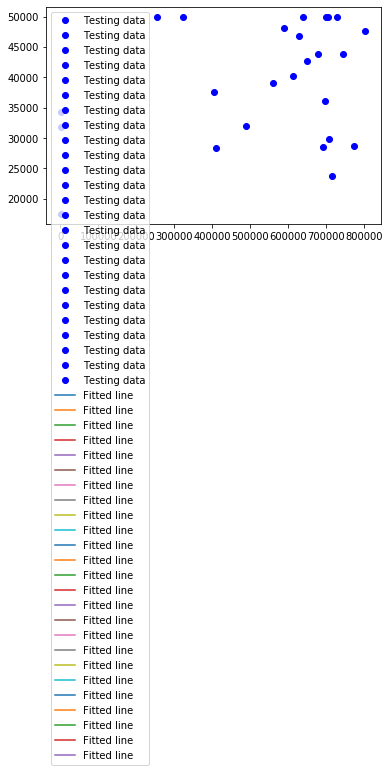

In [0]:
# Set placeholders for feature and target vectors 
X = tf.placeholder(tf.float32) 
y = tf.placeholder(tf.float32) 

# Set model weights and bias 
W = tf.Variable(np.random.randn(), name="weight") 
b = tf.Variable(np.random.randn(), name="bias") 

# Construct a linear model 
linear_model = W*X + b 

# Mean squared error 
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples) 

# Gradient descent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Initializing the variables 
init = tf.global_variables_initializer() 

# Launch the graph 
with tf.Session() as sess: 
	# Load initialized variables in current session 
	sess.run(init) 

	# Fit all training data 
	for epoch in range(training_epochs): 

		# perform gradient descent step 
		sess.run(optimizer, feed_dict={X: train_X, y: train_y}) 
		
		# Display logs per epoch step 
		if (epoch+1) % display_step == 0: 
			c = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
			print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}". 
				format(epoch+1, c, sess.run(W), sess.run(b))) 
			
	# Print final parameter values 
	print("Optimization Finished!") 
	training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y}) 
	print("Final training cost:", training_cost, "W:", sess.run(W), "b:", 
		sess.run(b), '\n') 
	
	# Graphic display 
	plt.plot(train_X, train_y, 'ro', label='Original data') 
	plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
	plt.legend() 
	plt.show() 

	# Testing the model 
	testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
							feed_dict={X: test_X, y: test_y}) 
	
	print("Final testing cost:", testing_cost) 
	print("Absolute mean square loss difference:", abs(training_cost - testing_cost)) 

	# Display fitted line on test data 
	plt.plot(test_X, test_y, 'bo', label='Testing data') 
	plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') 
	plt.legend() 
	plt.show() 


In [0]:
test_X

array(['eta'], dtype='<U3')